# Домашнее задание "Продвинутая оптимизация".

### Задание

При фиксированном `seed=42` поэкспериментируйте с параметрами алгоритма [differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html): strategy, popsize, mutation.

Постройте графики количества итераций (`nit`) оптимизации [функции ackley](https://en.wikipedia.org/wiki/Ackley_function) от значения параметра. 

Подробнее о результате выдачи [тут](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html).

In [183]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [313]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [185]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

 message: Optimization terminated successfully.
 success: True
     fun: 4.440892098500626e-16
       x: [ 0.000e+00  0.000e+00]
     nit: 90
    nfev: 2793

In [187]:
### YOUR CODE HERE
# Присвоим началные значения параметрам strategy, popsize, mutation:
strategy_list = [
'best1bin',
'best1exp',
'rand1exp',
'randtobest1exp',
'currenttobest1exp',
'best2exp',
'rand2exp',
'randtobest1bin',
'currenttobest1bin',
'best2bin',
'rand2bin',
'rand1bin'
]
popsize_values = np.arange(10, 21, 1)
mutation_values = np.arange(1, -0.1, -0.1)

In [ ]:
# Для сохранения результатов работы метода создадим дата-фрейм
res_df = pd.DataFrame(columns = ['Strategy', 'Popsize', 'Mutation', 'Nit', 'X0', 'X1'])
# Вычислим результаты, перебирая все значения параметров:
for strategy in strategy_list:
    for popsize in popsize_values:
        for mutation in mutation_values:
            result = differential_evolution(
                func = ackley,
                bounds = bounds,
                seed = 42,
                strategy = strategy,
                popsize = popsize,
                mutation = mutation
            )
            new_row = {
                'Strategy': strategy,
                'Popsize': popsize,
                'Mutation': round(mutation, 1),
                'Nit': result.nit,
                'X0': round(result.x[0], 2),
                'X1': round(result.x[1], 2)
            }
            # Результаты запишем в дата-фрейм
            res_df.loc[len(res_df)] = new_row

In [189]:
# Полный перебор всех значений параметров и вычисление минимумов с ними происходит довольно долго.
# Чтобы не проходить данный этап повторно, запишем результат в csv файл.
# В дальнейшем можно будет не пересчитывать минимумы снова, а импортировать результаты из файла.
res_df.to_csv('differential_evolution_results.csv', index = False)

In [191]:
res_df = pd.read_csv('differential_evolution_results.csv')

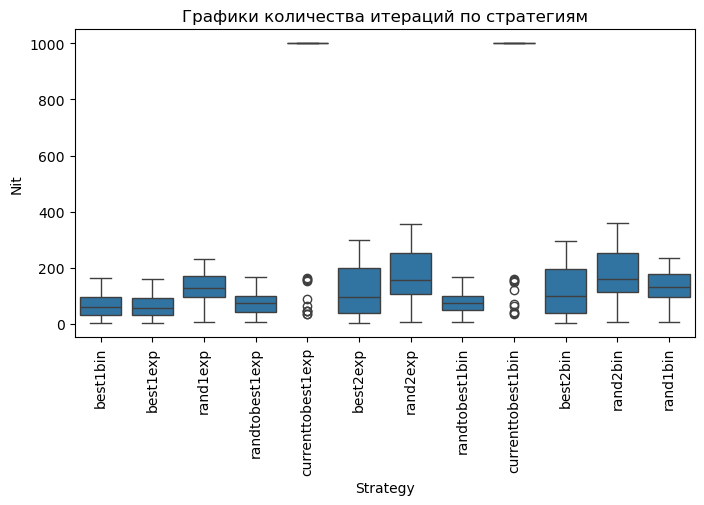

In [207]:
# Построим ящики с усами, чтобы увидеть стратегии (Strategy) с минимальным количеством итераций (Nit):
plt.figure(figsize = (8, 4))
plt.title('Графики количества итераций по стратегиям')
plt.xticks(rotation = 90)
sns.boxplot(data = res_df, x = 'Strategy', y = 'Nit')
plt.show()

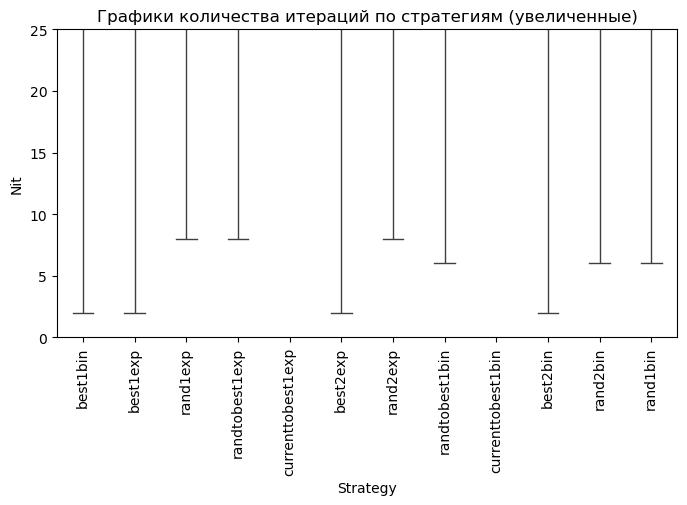

In [209]:
# Приблизительно видно, что минимумы лежат в пределах от 0 до 25.
# Приблизим графики в этом интервале:
plt.figure(figsize = (8, 4))
plt.title('Графики количества итераций по стратегиям (увеличенные)')
plt.ylim(0, 25)
plt.xticks(rotation = 90)
sns.boxplot(data = res_df, x = 'Strategy', y = 'Nit')
plt.show()

<tr>Из графиков видно, что минимальные значения кол-ва итераций у следующих стратегий:
    <li>best1bin</li>
    <li>best1exp</li>
    <li>best2exp</li>
    <li>best2bin</li>
</tr>
Значения количества итераций по данным стратегиям не превышает 5. <br/>
Построим линейные графики, показывающие кол-во итераций для данных стратегий в зависимости от значений параметров Popsize и Mutation.<br/>
Для того, чтобы по оси X отложить значения обоих параметров, заведем в дата-фрейме новый столбец, образованный конкатенацией данных параметров:

In [49]:
res_df['Estimated'] = res_df['Popsize'].astype(str) + '#' + res_df['Mutation'].astype(str)

Помимо линейных графиков, нам необходимо исключить результаты, где точность результата была низкая. Для этого на графики нанесем точки, в которых результаты превышают по модулю 0.01

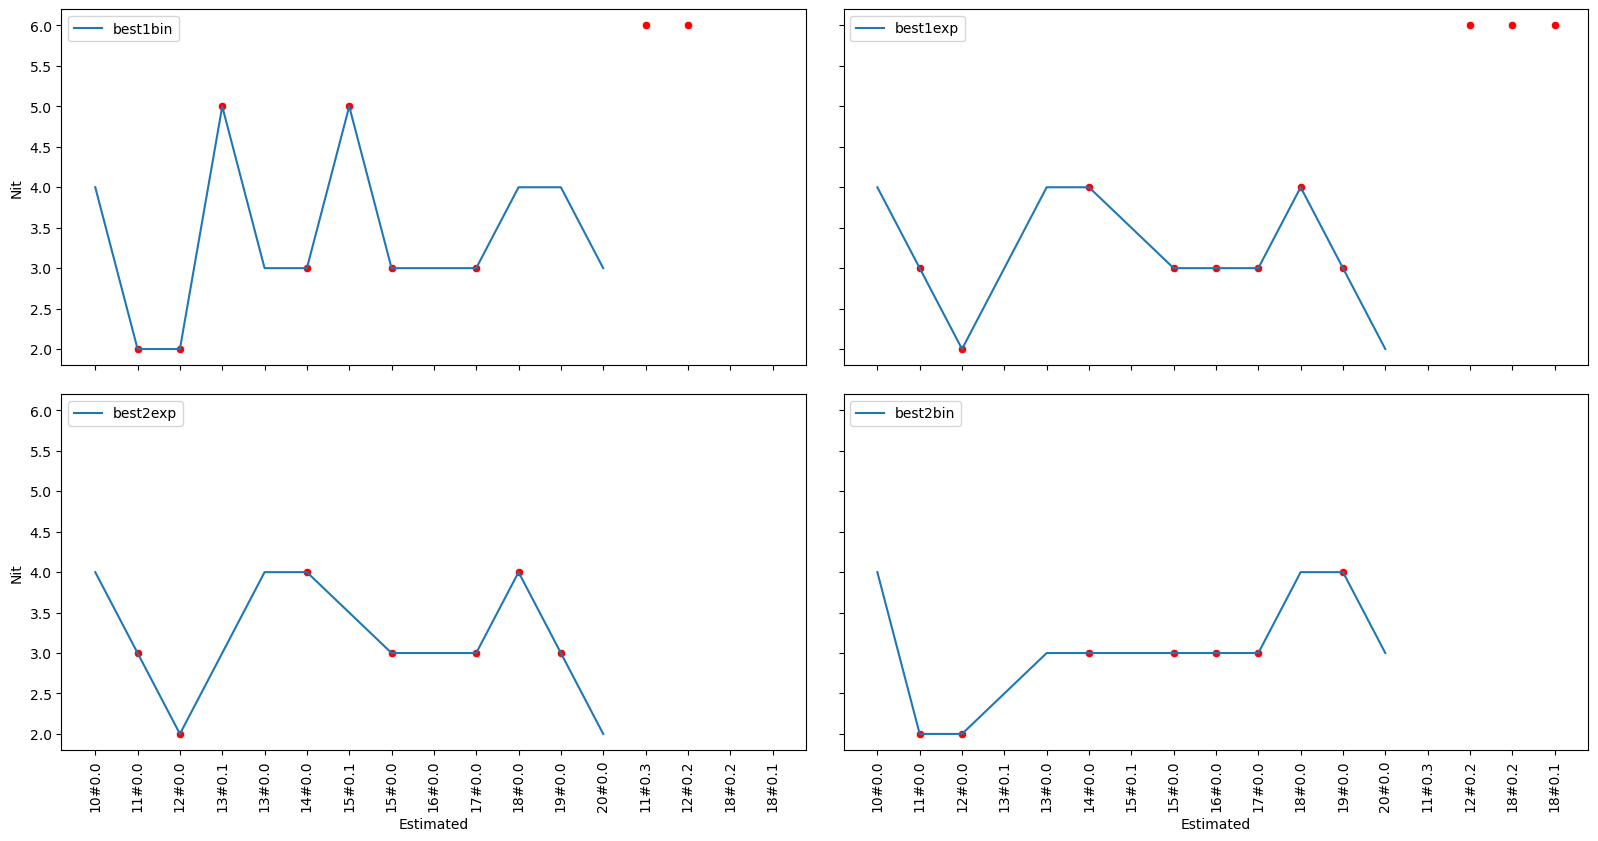

In [220]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 8), sharex = True, sharey = True)
plt.tight_layout()

sns.lineplot(
        data = res_df[(res_df.Strategy == 'best1bin') & (res_df.Nit <= 5)], 
        x = 'Estimated', y = 'Nit', hue = 'Strategy', ax = axes[0, 0]
        )
sns.lineplot(
        data = res_df[(res_df.Strategy == 'best1exp') & (res_df.Nit <= 5)], 
        x = 'Estimated', y = 'Nit', hue = 'Strategy', ax = axes[0, 1]
        )
sns.lineplot(
        data = res_df[(res_df.Strategy == 'best2exp') & (res_df.Nit <= 5)], 
        x = 'Estimated', y = 'Nit', hue = 'Strategy', ax = axes[1, 0]
        )
sns.lineplot(
        data = res_df[(res_df.Strategy == 'best2bin') & (res_df.Nit <= 5)], 
        x = 'Estimated', y = 'Nit', hue = 'Strategy', ax = axes[1, 1]
        )

sns.scatterplot(
    data = res_df[
        (res_df.Strategy == 'best1bin') &
        ((abs(res_df.X0) >= 0.01) | (abs(res_df.X1) >= 0.01))
    ],
    x = 'Estimated', y = 'Nit', color = 'red', ax = axes[0, 0]
)
sns.scatterplot(
    data = res_df[
        (res_df.Strategy == 'best1exp') &
        ((abs(res_df.X0) >= 0.01) | (abs(res_df.X1) >= 0.01))
    ],
    x = 'Estimated', y = 'Nit', color = 'red', ax = axes[0, 1]
)
sns.scatterplot(
    data = res_df[
        (res_df.Strategy == 'best2exp') &
        ((abs(res_df.X0) >= 0.01) | (abs(res_df.X1) >= 0.01))
    ],
    x = 'Estimated', y = 'Nit', color = 'red', ax = axes[1, 0]
)
sns.scatterplot(
    data = res_df[
        (res_df.Strategy == 'best2bin') &
        ((abs(res_df.X0) >= 0.01) | (abs(res_df.X1) >= 0.01))
    ],
    x = 'Estimated', y = 'Nit', color = 'red', ax = axes[1, 1]
)

axes[0, 0]

axes[0, 0].legend(loc = 'upper left')
axes[0, 1].legend(loc = 'upper left')
axes[1, 0].legend(loc = 'upper left')
axes[1, 1].legend(loc = 'upper left')

plt.setp(axes[1, 0].get_xticklabels(), rotation = 90)
plt.setp(axes[1, 1].get_xticklabels(), rotation = 90)

plt.show()

Из данных графиков нужно найти минимумы, в которых отсутствуют красные точки. Т.е, в которых количество итераций минимально и точность результата не превышает 0.01.<br/>
<tr>Видно, что данным критериям удовлетворяют следующий значения:
    <li>Strategy = best1exp; Popsize = 20; Mutation = 0; Кол-во итераций = 2;</li>
    <li>Strategy = best2exp; Popsize = 20; Mutation = 0; Кол-во итераций = 2;</li>
</tr>
Проверим результаты работы метода поиска минимумов с данными параметрами:

In [226]:
result = differential_evolution(
                func = ackley,
                bounds = bounds,
                seed = 42,
                strategy = 'best1exp',
                popsize = 20,
                mutation = 0.0
            )
print(result)

 message: Optimization terminated successfully.
 success: True
     fun: 1.4437380180254422e-09
       x: [ 5.095e-10 -3.090e-11]
     nit: 2
    nfev: 321
     jac: [ 2.828e+00  2.679e+00]


In [228]:
result = differential_evolution(
                func = ackley,
                bounds = bounds,
                seed = 42,
                strategy = 'best2exp',
                popsize = 20,
                mutation = 0.0
            )
print(result)

 message: Optimization terminated successfully.
 success: True
     fun: 1.4437380180254422e-09
       x: [ 5.095e-10 -3.090e-11]
     nit: 2
    nfev: 321
     jac: [ 2.828e+00  2.679e+00]


Видно, что минимумы были найдены всего за 2 итерации.

### Дополнительное задание


Поэкспериментируйте с параметрами и оптимизацией через [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html):

In [347]:
from scipy.optimize import minimize

x0 = [0,0]

result_m = minimize(ackley, x0,  method='Nelder-Mead')
result_m

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 4.440892098500626e-16
             x: [ 0.000e+00  0.000e+00]
           nit: 8
          nfev: 17
 final_simplex: (array([[ 0.000e+00,  0.000e+00],
                       [-1.607e-05, -8.453e-06],
                       [-1.404e-06, -3.113e-05]]), array([ 4.441e-16,  5.136e-05,  8.816e-05]))

In [349]:
### YOUR CODE HERE
# Создадим список методов, которые не требуют дополнительных параметров:
methods = [
    'Nelder-Mead',
    'Powell',
    'CG',
    'BFGS',
    'L-BFGS-B',
    'TNC',
    'SLSQP',
    'trust-constr'
]

In [351]:
# Для сохранения результатов работы метода создадим дата-фрейм
res_m_df = pd.DataFrame(columns = ['Method', 'X0_0', 'X0_1', 'Nit', 'X0', 'X1'])
# Вычислим результаты, перебирая все значения параметров.
# Начальные значения независимых параметров будем перебирать в диапазоне от -10 до 10.
for method in methods:
    for x0_0 in np.arange(-10, 11):
        for x0_1 in np.arange(-10, 11):
            result_m = minimize(ackley, x0 = [x0_0, x0_1], method = method)
            new_row = {
                'Method': method,
                'X0_0': x0_0,
                'X0_1': x0_1,
                'Nit': result_m.nit,
                'X0': result_m.x[0],
                'X1': result_m.x[1]
            }
            # Результаты запишем в дата-фрейм
            res_m_df.loc[len(res_m_df)] = new_row

In [363]:
# Из дата-фрейма выведем результаты, которые не отличаются от истинных более чем на 0.01 и отсортируем по кол-ву итераций:
res_m_df[(abs(res_m_df.X0) <= 0.01) & (abs(res_m_df.X1) <= 0.01)].sort_values(by = 'Nit').head(10)

Method  X0_0  X0_1  Nit            X0            X1
2425       TNC     0     0    0  0.000000e+00  0.000000e+00
1984  L-BFGS-B     0     0    0  0.000000e+00  0.000000e+00
1102        CG     0     0    0  0.000000e+00  0.000000e+00
1543      BFGS     0     0    0  0.000000e+00  0.000000e+00
1565      BFGS     1     1    1 -5.572008e-09 -5.572008e-09
661     Powell     0     0    1  0.000000e+00  0.000000e+00
1124        CG     1     1    1 -5.572008e-09 -5.572008e-09
639     Powell    -1    -1    2  0.000000e+00  0.000000e+00
640     Powell    -1     0    2  0.000000e+00  0.000000e+00
1587      BFGS     2     2    3 -7.389451e-09 -7.389451e-09

<tr>Видно, что следующие методы нашли результат сразу при начальных значениях X совпадающих с минимумами:
    <li>TNC;</li>
    <li>L-BFGS-B;</li>
    <li>CG;</li>
    <li>BFGS;</li>
</tr>
Чем дальше начальные значения удаляются от истинных минимальных, тем растет кол-во итераций для поиска минимума. <br/>
<tr>Следующие методы находят минимумы с наименьшим кол-вом итераций:
    <li>TNC;</li>
    <li>L-BFGS-B;</li>
    <li>CG;</li>
    <li>BFGS;</li>
    <li>Powell;</li>
</tr>

Вы также можете поэкспериментировать с [другими методами оптимизации](https://habr.com/ru/company/prequel/blog/568496/), но это не обязательно для зачета.
